In [1]:
import time
start = time.time()

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)

import nltk
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import re
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

le= WordNetLemmatizer()
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

from tqdm import tqdm
tqdm.pandas(desc ="may bar!")

from textblob import TextBlob
import scipy.stats as stats
from collections import Counter
from sklearn.manifold import TSNE
from wordcloud import wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore")

In [4]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV

import gensim
from gensim import models, corpora
from gensim.models import LsiModel
from gensim import similarities

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.metrics.pairwise import euclidean_distances

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [6]:
#!pip3 install pyLDAvis

In [7]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [8]:
documents = pd.read_csv('documents.csv')
len(documents)

25637

In [9]:
documents.head()

,document
0,My husband is a born shopper. He loves to look...
1,Tea drinking was common in China for nearly on...
2,"Once upon a time, there was a scholar who want..."
3,When newspapers and radio describe the damage ...
4,Below is a page adapted from About Wikipedia ...


In [10]:
train_documents = documents[:int(len(documents)*0.9)]
test_documents = documents[int(len(documents)*0.9):]
print(len(train_documents), len(test_documents))
assert len(train_documents) + len(test_documents) == len(documents)

23073 2564


In [11]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [12]:
dataset = [train_documents, test_documents]

### Text Cleanning

In [13]:
def clean_documents(text):
    
    if pd.isnull(text):
        return text
    
    text = text.lower()
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word , contractions[word.lower()])
            
    text          = re.sub("[^a-zA-Z#]", ' ', text)
    word_tokens   = nltk.word_tokenize(text)
    tokens        = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w) >3]
    cleanned_text = " ".join(tokens)
    
    return cleanned_text

In [14]:
train_documents['clean_document'] = train_documents['document'].progress_apply(lambda x: clean_documents(x))

may bar!: 100%|█████████████████████████████████████████████████████████████████| 23073/23073 [02:03<00:00, 186.15it/s]


In [15]:
train_documents.head(10)

,document,clean_document
0,My husband is a born shopper. He loves to look...,husband born shopper love look thing touch lik...
1,Tea drinking was common in China for nearly on...,drinking common china nearly thousand year any...
2,"Once upon a time, there was a scholar who want...",upon time scholar wanted gain knowledge even t...
3,When newspapers and radio describe the damage ...,newspaper radio describe damage caused hurrica...
4,Below is a page adapted from About Wikipedia ...,page adapted wikipedia take full advantage wik...
5,"Sir Arthur Conan Doyle, who wrote the story of...",arthur conan doyle wrote story detective sherl...
6,How important can a fifteen-year-old boy's wor...,important fifteen year work well louis braille...
7,Finding a good friend can be quite difficult i...,finding good friend quite difficult contempora...
8,People have strange ideas about food. For exam...,people strange idea food example tomato kind d...
9,Americans Spend Their Free Time In Various Way...,american spend free time various way america c...


In [16]:
test_documents['clean_document'] = test_documents['document'].progress_apply(lambda x : clean_documents(x))

may bar!: 100%|███████████████████████████████████████████████████████████████████| 2564/2564 [00:12<00:00, 201.43it/s]


In [17]:
test_documents.head()

,document,clean_document
23073,"For Senior 3 students, choosing which college ...",senior student choosing college attend excitin...
23074,COVER STORY--Pax's New Life \nBy Michelle Tau...,cover story life michelle tauber mary green ac...
23075,Do you suffer from perfectionism ?\nAccording ...,suffer perfectionism according psychologist pe...
23076,Body language is a very powerful tool of a com...,body language powerful tool communication peop...
23077,I stood at the wqindow and watched the neighbo...,stood wqindow watched neighborhood child flyin...


In [18]:
train_docs = train_documents.copy()
test_docs = test_documents.copy()

In [19]:
def get_top_n_words(n_top_words, count_vectorizer , text_data):
    
    """
    returns a tuple of the top n words in a sample and their
    accompanying counts, given a Countvectorizer object and text sample
    """
    
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    
    word_indices = np.flip(np.argsort(vectorized_total)[0,:],1)
    
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i, word_indices[0,i]] = 1
    
    words =[word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]
    
    return (words, word_values[0,:n_top_words].tolist()[0])

In [20]:
def get_keys(topic_matrix):
    
    """ returns an integer list of predicted topic categories for a given matrix"""
    
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_include(keys):
    
    """ returns a tuple of topic categories and their acommoanying magnitudes for a given list of keys"""
    
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts=[pair[1] for pair in count_pairs]
    
    return (categories, counts)

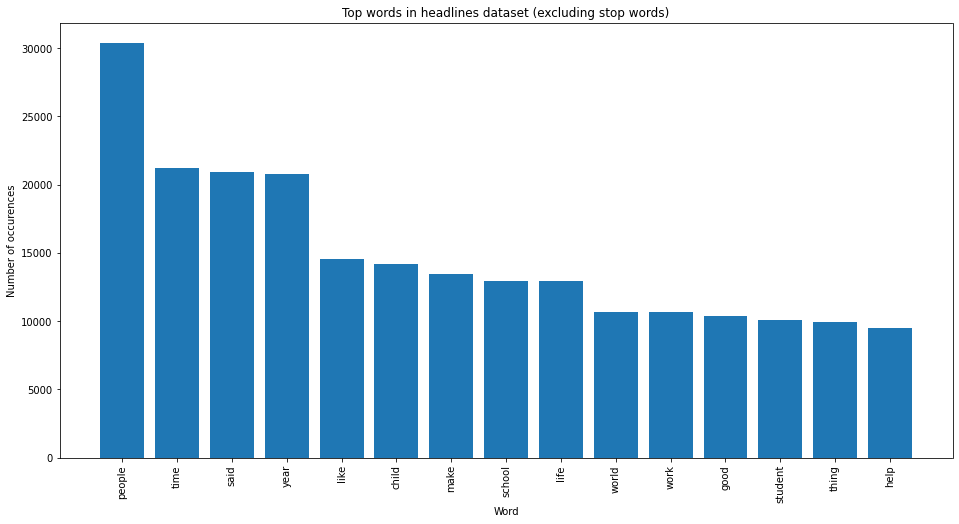

In [21]:
count_vectorizer = CountVectorizer(stop_words='english')

words , word_values = get_top_n_words(n_top_words= 15,
                                     count_vectorizer= count_vectorizer,
                                     text_data = train_documents['clean_document'])

fig , ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [22]:
def stats_of_documents(data_df):
    
    data = data_df['clean_document'].tolist()
    tagged_headlines = [TextBlob(data[i]).pos_tags for i in range(len(data))]
    
    tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})
    
    word_counts = []
    pos_counts = {}
    
    for headline in tagged_headlines_df[u'tags']:
        word_counts.append(len(headline))
        for tag in headline:
            if tag[1] in pos_counts:
                pos_counts[tag[1]] += 1
            else:
                pos_counts[tag[1]] = 1
                
    print("Total no of words=", np.sum(word_counts))
    print('Total number of words: ', np.sum(word_counts))
    print('Mean number of words per headline: ', np.mean(word_counts))
    print('Minimum number of words per headline: ', np.min(word_counts))
    print('Maximum number of words per headline: ', np.max(word_counts))

    pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
    pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

    fig, ax = plt.subplots(figsize=(18,8))
    ax.bar(range(len(pos_counts)), pos_sorted_counts)
    ax.set_xticks(range(len(pos_counts)))
    ax.set_xticklabels(pos_sorted_types)
    ax.set_title('Part-of-Speech Tagging for Headlines Corpus')
    ax.set_xlabel('Type of Word')

                

Total no of words= 3160055
Total number of words:  3160055
Mean number of words per headline:  136.95899969661508
Minimum number of words per headline:  28
Maximum number of words per headline:  572


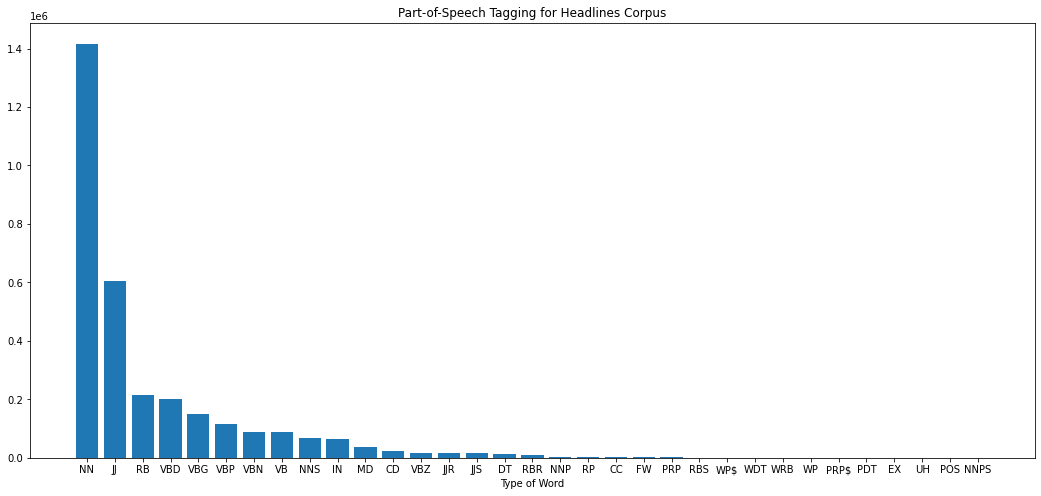

In [23]:
stats_of_documents(train_documents)

## Topic Modelling

### 1) LSA - Latent Semantic Analysis